# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

# Подсчёт средней абсолютной ошибки
def calculateMeanAbsoluteError(realFunction, predictedValue, numberOfElements):
    return np.sum(np.abs(realFunction - predictedValue)) / numberOfElements

# Подсчёт среднеквадратичной ошибки
def calculateMeanSquaredError(realFunction, predictedValue, numberOfElements):
    return np.sum((realFunction - predictedValue)**2) / numberOfElements

# Метод наименьших квадратов
def calculateMinimalSquares(inputX, inputY):
    xArray = np.ones((inputX.shape[0], 1))
    correctedXArray = np.hstack((xArray, inputX))

    correctedX = correctedXArray.T.dot(correctedXArray)
    correctedY = correctedXArray.T.dot(inputY)

    result = np.linalg.inv(correctedX).dot(correctedY)

    weight = result[1:]
    bias = result[0]

    return weight, bias

In [ ]:
# Подсчёт веса и смещения
weight, bias = calculateMinimalSquares(X_train, y_train)

# Корректировка X_train
correctedXTrain = X_train@weight + bias

numberOfElements = len(correctedXTrain)

# Подсчёт ошибок
meanAbsoluteError = calculateMeanAbsoluteError(y_train, correctedXTrain, numberOfElements)
meanSquaredError = calculateMeanSquaredError(y_train, correctedXTrain, numberOfElements)

# Вывод полученных значений
print('weight = ',  round(weight[0], 3), '\t' ,  'bias = ',  round(bias, 3))
print('Mean absolute error = ', round(meanAbsoluteError, 3) , '\t' ,  'Mean squared error = ', round(meanSquaredError, 3))

weight =  10.398 	 bias =  -6.645
Mean absolute error =  8.8 	 Mean squared error =  117.644


In [ ]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sklm

# Задание модели
sklearnModel = LinearRegression()
sklearnModel.fit(X_train, y_train)

# Подсчёт веса и смещения
sklearnWeight = sklearnModel.coef_[0]
sklearnBias = sklearnModel.intercept_

# Подсчёт ошибок
sklearnMeanAbsoluteError = sklm.mean_absolute_error(y_train, sklearnModel.predict(X_train))
sklearnMeanSquaredError = sklm.mean_squared_error(y_train, sklearnModel.predict(X_train))

# Вывод полученных значений
print('Sklearn Weight = ', round(sklearnWeight, 3), '\t' ,  'Sklearn Bias = ', round(sklearnBias, 3))
print('Sklearn Mean Absolute Error  = ', round(sklearnMeanAbsoluteError, 3) , '\t' ,  'Sklearn Mean Squared Error = ', round(sklearnMeanSquaredError, 3))

Sklearn Weight =  10.398 	 Sklearn Bias =  -6.645
Sklearn Mean Absolute Error  =  8.8 	 Sklearn Mean Squared Error =  117.644


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

# Задание данных 
secondXTrain = data['x_train'].reshape(-1, 1)
secondYTrain = data['y_train'].reshape(-1, 1)

# Подсчёт веса и смещения
secondWeight, secondBias = calculateMinimalSquares(secondXTrain, secondYTrain)

# Корректировка X_train
correctedXTrain =  secondXTrain.reshape(-1, 1).dot(secondWeight[0]) + secondBias

# Подсчёт ошибок
secondMeanAbsoluteError = calculateMeanAbsoluteError(secondYTrain, correctedXTrain)
secondMeanSquaredError = calculateMeanSquaredError(secondYTrain, correctedXTrain)

# Вывод полученных значений
print('Weight = ', secondWeight[0][0], '\t' ,  'Bias = ', secondBias[0])
print('Mean Absolute Error  = ', secondMeanAbsoluteError , '\t' ,  'Mean Squared Error = ', secondMeanSquaredError)

Weight =  -0.3013180539771215 	 Bias =  1.9222450098942043
Mean Absolute Error  =  0.7725765768706114 	 Mean Squared Error =  0.884645471416199


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

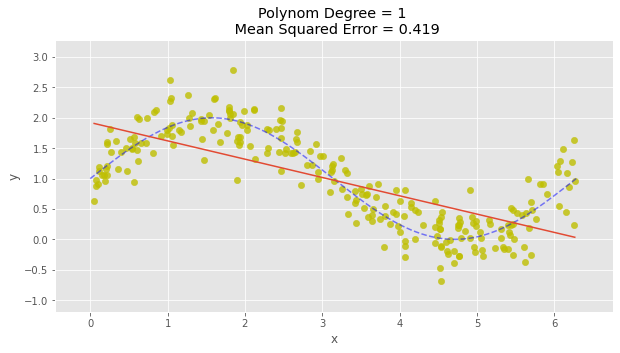

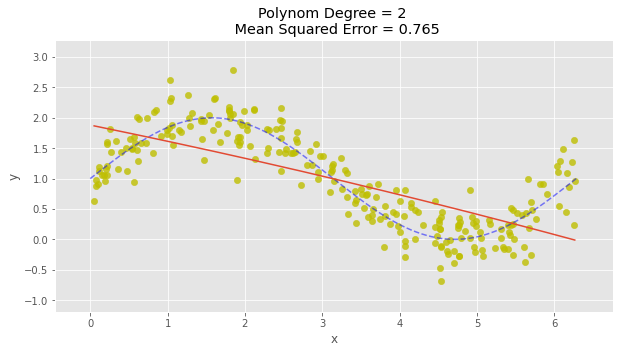

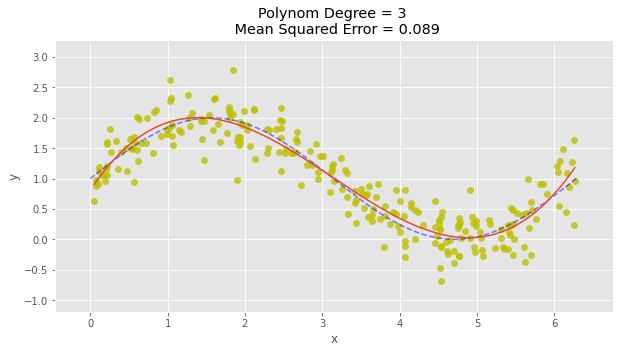

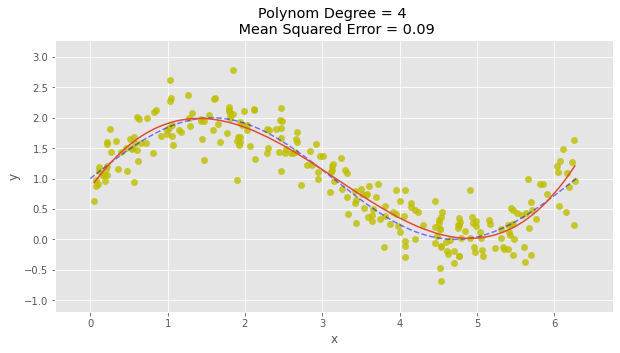

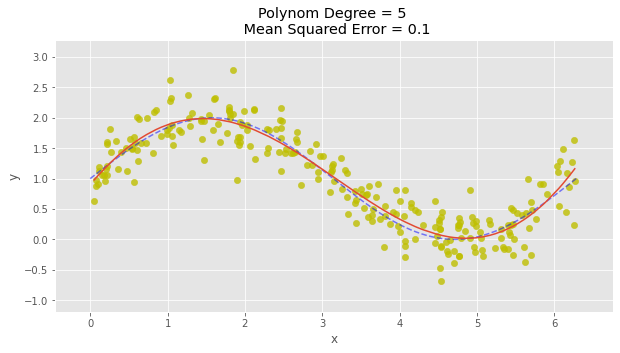

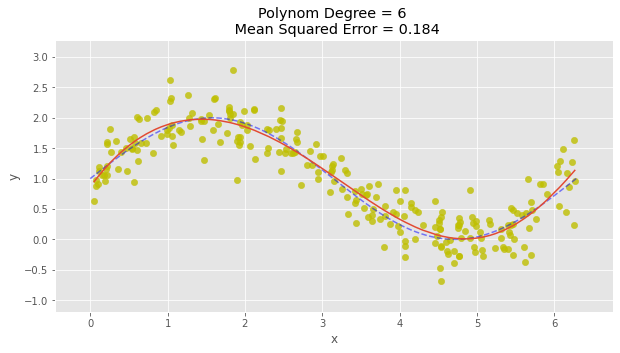

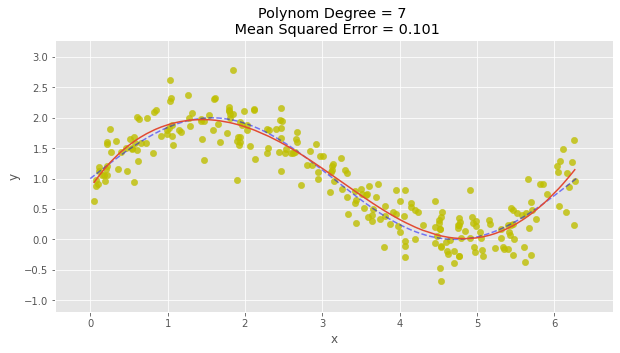

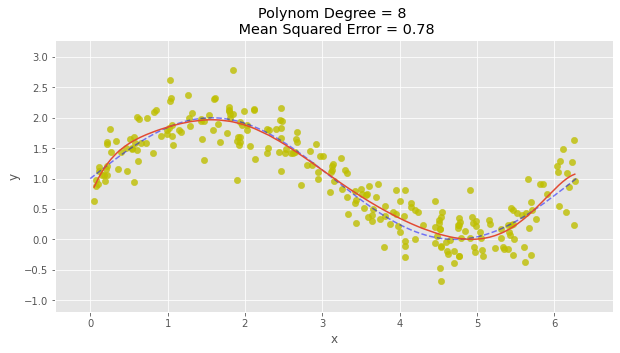

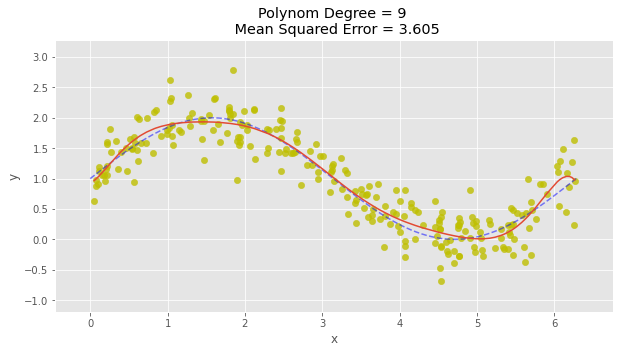

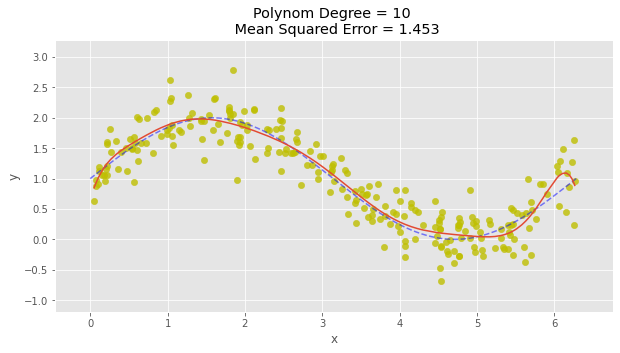

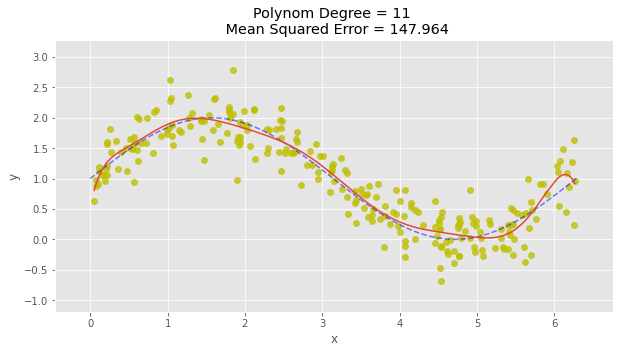

In [ ]:
from IPython.core.error import InputRejected
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

# Визуализация для полиномов разных степеней
for polynomDegree in range (1, 12):
    plt.figure(figsize=(10, 5))
    margin = 0.5

    plt.xlabel('x')
    plt.ylabel('y')

    plt.plot(data['support'], data['values'], 'b--', alpha = 0.5, label = 'diversity')
    plt.scatter(data['x_train'], data['y_train'], 40, 'y', 'o', alpha = 0.8, label = 'data')

    plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
    plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)

    polynomialRegression = Pipeline([('PolynomialFeatures', PolynomialFeatures(degree = polynomDegree)), ('linearRegression', LinearRegression())])
    polynomialRegression.fit(data['x_train'].reshape(-1, 1), data['y_train'])

    scores = cross_val_score(polynomialRegression, data['x_train'].reshape(-1, 1), data['y_train'], scoring = 'neg_mean_squared_error', cv = 10)
    meanOfScores =  -scores.mean()

    plt.plot(data['x_train'], polynomialRegression.predict(data['x_train'].reshape(-1, 1)), label = 'predicted')
    plt.title('Polynom Degree = {} \n Mean Squared Error = {}'.format(polynomDegree,  round(meanOfScores, 3)))

    plt.show()

В рамках рассмотренного случая наиболее подходит полином степени 3. Ему свойственна наименьшая среднеквадратичная ошибка.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
#Загрузка данных
houseData = load_boston()

# Создание датасета
xValues = pd.DataFrame(houseData['data'], columns = houseData['feature_names'])
yValues = houseData['target']

# Вывод информации
xValues

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as sc

# Функция для обработки данных, обучения моделей и получения необходимых значений для последующей обработки
def calculatePrediction():
    X_train, X_test, y_train, y_test = tts(xValues, yValues, train_size=0.7)

    # Задаём стандартизацию и модель 
    scaler = sc()
    model = LinearRegression()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Тренируем модель
    model.fit(X_train, y_train)

    predictedXTrain = model.predict(X_train)
    predictedXTest = model.predict(X_test)

    return y_train, predictedXTrain, y_test, predictedXTest, model.coef_

In [ ]:
Y_train, predicted_Y_train, Y_test, predicted_Y_test, weight = calculatePrediction()

# Подсчёт ошибок
firstTrainMeanAbsoluteError = calculateMeanAbsoluteError(Y_train, predicted_Y_train)
firstTrainMeanSquaredError = calculateMeanSquaredError(Y_train, predicted_Y_train)

# Вывод полученных значений
print('Train Mean Absolute Error  = ', firstTrainMeanAbsoluteError , '\t' ,  'Train Mean Squared Error = ', firstTrainMeanSquaredError)

# Подсчёт ошибок
firstTestMeanAbsoluteError = calculateMeanAbsoluteError(Y_test, predicted_Y_test)
firstTestMeanSquaredError = calculateMeanSquaredError(Y_test, predicted_Y_test)

# Вывод полученных значений
print('Test Mean Absolute Error  = ', firstTestMeanAbsoluteError , '\t' ,  'Test Mean Squared Error = ', firstTestMeanSquaredError)

data = pd.DataFrame(data ={'weights': weight, 'values': xValues.columns})
data = data.iloc[(-np.abs(data['weights'].values)).argsort()].head(7)

print('Errors for the top 7 most significant values:')

Y_train, predicted_Y_train, Y_test, predicted_Y_test, weight = calculatePrediction()

# Подсчёт ошибок
firstTrainMeanAbsoluteError = calculateMeanAbsoluteError(Y_train, predicted_Y_train)
firstTrainMeanSquaredError = calculateMeanSquaredError(Y_train, predicted_Y_train)

# Вывод полученных значений
print('Train Mean Absolute Error  = ', firstTrainMeanAbsoluteError , '\t' ,  'Train Mean Squared Error = ', firstTrainMeanSquaredError)

# Подсчёт ошибок
firstTestMeanAbsoluteError = calculateMeanAbsoluteError(Y_test, predicted_Y_test)
firstTestMeanSquaredError = calculateMeanSquaredError(Y_test, predicted_Y_test)

# Вывод полученных значений
print('Test Mean Absolute Error  = ', firstTestMeanAbsoluteError , '\t' ,  'Test Mean Squared Error = ', firstTestMeanSquaredError)


Train Mean Absolute Error  =  3.2852287381840335 	 Train Mean Squared Error =  22.059155073291144
Test Mean Absolute Error  =  3.398152069771885 	 Test Mean Squared Error =  22.946564826607727
Errors for the top 7 most significant values:
Train Mean Absolute Error  =  3.427596654544053 	 Train Mean Squared Error =  23.6679904456099
Test Mean Absolute Error  =  3.4666677978352696 	 Test Mean Squared Error =  20.299762045844204


Из-за "среза" возникает небольшое увеличение значений ошибок и, значит, чуть ухудшилаcь точность выполнения производимых вычислений.
